In [3]:
import numpy as np

tmp_dir = '/big/work/metadevol/cami2_datasets/marine/bowtie_bamfiles/tmp/'

# read_dist10K = np.load(tmp_dir + 'X_metadevoldistreadsample.npy')

# read_scpdist10K = np.load(tmp_dir + 'X_scpmetadevoldistreadsample.npy')

# read_dist10K




cluster_dist = np.load(tmp_dir + 'X_dist_clustercentroids.npy')
# dist_clust97_kmer = np.load(tmp_dir + 'X_clust97spset_metadevoldistkmerwithcap.npy')

In [42]:
import pandas as pd
clust_purity = pd.read_csv(tmp_dir+'purity_of_clusters', header=None,sep=' ')
clust_component = pd.read_csv(tmp_dir+'components_combined_newalgo', header=None,sep=' ')
# pd.DataFrame(np.diag(cluster_dist))
clust_data = clust_purity.merge(pd.DataFrame(np.diag(cluster_dist)), left_index=True, right_index=True)
clust_data = clust_data.merge(clust_component, left_index=True, right_index=True)[['0_x','1_x','0_y','1_y']]
clust_data.columns = ['index','purity','self_distance','component_id']

clust_data

index    purity  self_distance  component_id
0          0   66.6667       0.000000             0
1          1   66.6667       0.000000             1
2          2   96.2687       0.000000             2
3          3  100.0000       0.000000             3
4          4   71.4286       0.000000             4
...      ...       ...            ...           ...
31364  31364  100.0000       1.743338         14295
31365  31365  100.0000       1.636387         14296
31366  31366  100.0000       1.003734         14297
31367  31367  100.0000       1.349688            19
31368  31368  100.0000       1.019009            19

[31369 rows x 4 columns]

In [12]:
sel_indices = np.loadtxt(tmp_dir + 'selected_indices')
sel_indices = sel_indices.astype(int)

In [28]:
import pandas as pd
clust97_labels = pd.read_csv(tmp_dir + 'cluster97_allspselindex_labels', header=None, sep=" ")

clust97_labels.columns = ['index','cid','contig','indexr','length','genome_id','cluster_id']

In [29]:
clust97_labels

index       cid      contig  indexr  length genome_id  cluster_id
0           0        12       S0C12       0    1620   Otu79.1         151
1           3        50       S0C50       3    1761    Otu152         658
2          10       216      S0C216      10    5090   Otu79.1         191
3          12       263      S0C263      12    1852    Otu139        1047
4          18       482      S0C482      18    2448  Otu137.0          24
...       ...       ...         ...     ...     ...       ...         ...
56425  702009  18056918  S9C1587148  702009   23336  Otu281.0          24
56426  702010  18056934  S9C1587164  702010    2974   Otu79.1         220
56427  702012  18057002  S9C1587232  702012    2274  Otu248.0         618
56428  702016  18057104  S9C1587334  702016    6998  Otu119.1         118
56429  702024  18057340  S9C1587570  702024    9218   Otu79.0         244

[56430 rows x 7 columns]

In [17]:
read_dist10K[sel_indices]

array([[ 11.459535,  21.383322,  14.719168, ...,  45.800495,   6.181868,
         11.235401],
       [ 19.854849,  83.511345,  47.477787, ...,  17.981314,  78.05035 ,
         44.811695],
       [ 19.995016, 104.9782  ,  52.984028, ...,  16.233694,  92.463585,
         54.31429 ],
       ...,
       [ 23.70989 , 128.99037 ,  53.778538, ...,  21.737722, 112.92123 ,
         74.40414 ],
       [ 20.923086, 131.64558 ,  55.785282, ...,  20.587942, 112.61681 ,
         73.03567 ],
       [ 45.75903 ,  30.606955,  12.355043, ...,  88.82937 ,  14.084495,
         52.41115 ]], dtype=float32)

In [19]:
clust_data

index    purity  self_distance
0          0   66.6667       0.000000
1          1   66.6667       0.000000
2          2   96.2687       0.000000
3          3  100.0000       0.000000
4          4   71.4286       0.000000
...      ...       ...            ...
31364  31364  100.0000       1.743338
31365  31365  100.0000       1.636387
31366  31366  100.0000       1.003734
31367  31367  100.0000       1.349688
31368  31368  100.0000       1.019009

[31369 rows x 3 columns]

In [6]:
# Plot

import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import umap
import umap.plot

# my_model_read = umap.UMAP(metric='precomputed')
# my_model_fit_read = my_model_read.fit(np.matrix(subset))




In [7]:
my_model_clust = umap.UMAP(metric='precomputed', low_memory=True)
my_model_fit_clust = my_model_clust.fit(np.matrix(cluster_dist))
# my_model_kmer = umap.UMAP(metric='precomputed', low_memory=True)
# my_model_fit_kmer = my_model_kmer.fit(np.matrix(dist_clust97_kmer))

/home/yazhini/.local/lib/python3.8/site-packages/umap/umap_.py:1780: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")


In [33]:
from distinctipy import distinctipy
N = 16
colors = distinctipy.get_colors(N)

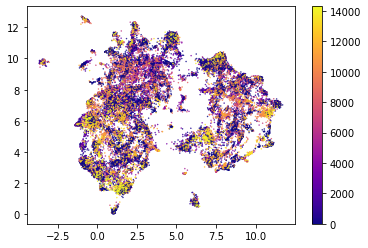

In [47]:
p=plt.scatter(my_model_clust.embedding_[:,0], my_model_clust.embedding_[:,1],c=clust_data['component_id'], cmap='plasma',s=0.2)

clb = plt.colorbar(p)
# umap.plot.points(my_model_fit_clust, labels=clust_data['purity'])
plt.savefig(tmp_dir + 'clusterdist_component.png',dpi=600, format='png',bbox_inches='tight')

In [48]:
umap.plot.output_notebook()
pp = umap.plot.interactive(my_model_fit_clust, hover_data=clust_data, point_size=4)
umap.plot.show(pp)

Loading BokehJS ...

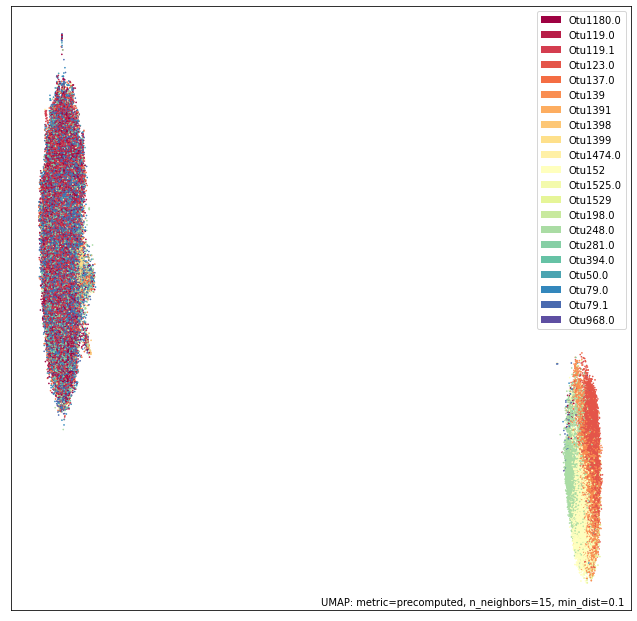

In [7]:
umap.plot.points(my_model_fit_kmer, labels=clust97_labels['genome_id'], color)

# plt.savefig(tmp_dir + 'metadevoldist_onlykmer.png',dpi=600, format='png',bbox_inches='tight')

In [32]:
import pandas as np


labels = pd.read_csv(tmp_dir + 'selected_inds_labels', header=None, sep=" ")


labels.columns = ['index', 'cid','contig','index1','length', 'genomeid']




In [25]:
umap.plot.output_notebook()
pp = umap.plot.interactive(my_model_fit_read, labels=clust97_labels["genome_id"], hover_data=clust97_labels, point_size=2)
umap.plot.show(pp)

Loading BokehJS ...

In [16]:
np.exp(-8)

0.00033546262790251185

In [15]:
1/1000

0.001